In [ ]:
# Regional Transportation Data Analysis and Model Improvement

In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Step 1: Data Collection
# Load data
data = pd.read_csv('C:/Users/dgous/OneDrive/Desktop/transportation_data.csv')
print("Data Loaded:")
print(data.head())

Data Loaded:
         date  traffic_volume  public_transit_usage  cross_border_travel  \
0  2024-01-01            1500                   800                  500   
1  2024-01-02            1600                   820                  520   
2  2024-01-03            1580                   790                  510   
3  2024-01-04            1700                   850                  530   
4  2024-01-05            1650                   830                  540   

  coastal_railway_condition  
0                      Good  
1                      Good  
2                      Fair  
3                      Fair  
4                      Good  


In [4]:
# Step 2: Data Processing
# Data cleaning
data.dropna(inplace=True)  # Remove missing values
data = data[data['traffic_volume'] > 0]  # Remove rows with non-positive traffic volume

# Convert date column to datetime
data['date'] = pd.to_datetime(data['date'])
print("Data after cleaning:")
print(data.head())

Data after cleaning:
        date  traffic_volume  public_transit_usage  cross_border_travel  \
0 2024-01-01            1500                   800                  500   
1 2024-01-02            1600                   820                  520   
2 2024-01-03            1580                   790                  510   
3 2024-01-04            1700                   850                  530   
4 2024-01-05            1650                   830                  540   

  coastal_railway_condition  
0                      Good  
1                      Good  
2                      Fair  
3                      Fair  
4                      Good  


In [5]:
# Step 3: Database Management
# Create SQLite database
engine = create_engine('sqlite:///transportation_data.db')
data.to_sql('transportation', con=engine, index=False, if_exists='replace')

# Query the database to verify data insertion
df = pd.read_sql('SELECT * FROM transportation', con=engine)
print("Data from SQL Database:")
print(df.head())

Data from SQL Database:
                         date  traffic_volume  public_transit_usage  \
0  2024-01-01 00:00:00.000000            1500                   800   
1  2024-01-02 00:00:00.000000            1600                   820   
2  2024-01-03 00:00:00.000000            1580                   790   
3  2024-01-04 00:00:00.000000            1700                   850   
4  2024-01-05 00:00:00.000000            1650                   830   

   cross_border_travel coastal_railway_condition  
0                  500                      Good  
1                  520                      Good  
2                  510                      Fair  
3                  530                      Fair  
4                  540                      Good  


In [6]:
# Step 4: Data Analysis and Model Improvement
# Convert coastal railway condition to numerical values
data['coastal_railway_condition'] = data['coastal_railway_condition'].map({'Good': 3, 'Fair': 2, 'Poor': 1})

# Define features and target
features = ['traffic_volume', 'public_transit_usage', 'cross_border_travel', 'coastal_railway_condition']
target = 'land_use'  # Assuming 'land_use' is the target variable

# For demonstration, let's add a dummy target variable
data['land_use'] = np.random.rand(len(data))

# Split the data
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the enhanced model
enhanced_model = LinearRegression()
enhanced_model.fit(X_train, y_train)

# Save the enhanced model
with open('enhanced_land_use_model.pkl', 'wb') as file:
    pickle.dump(enhanced_model, file)
print("Enhanced model trained and saved.")

# Evaluate the enhanced model
y_pred_enhanced = enhanced_model.predict(X_test)
mse_enhanced = mean_squared_error(y_test, y_pred_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced)
print(f"Enhanced Model - MSE: {mse_enhanced}, R2: {r2_enhanced}")

Enhanced model trained and saved.
Enhanced Model - MSE: 0.041572162219218535, R2: 0.20444444526295802


In [7]:
# Step 5: Quality Assurance and Quality Control
# Data validation
assert data['traffic_volume'].min() > 0, "Traffic volume contains non-positive values"
assert data['public_transit_usage'].min() > 0, "Public transit usage contains non-positive values"
assert data['cross_border_travel'].min() > 0, "Cross-border travel contains non-positive values"
print("Data validation passed.")

Data validation passed.


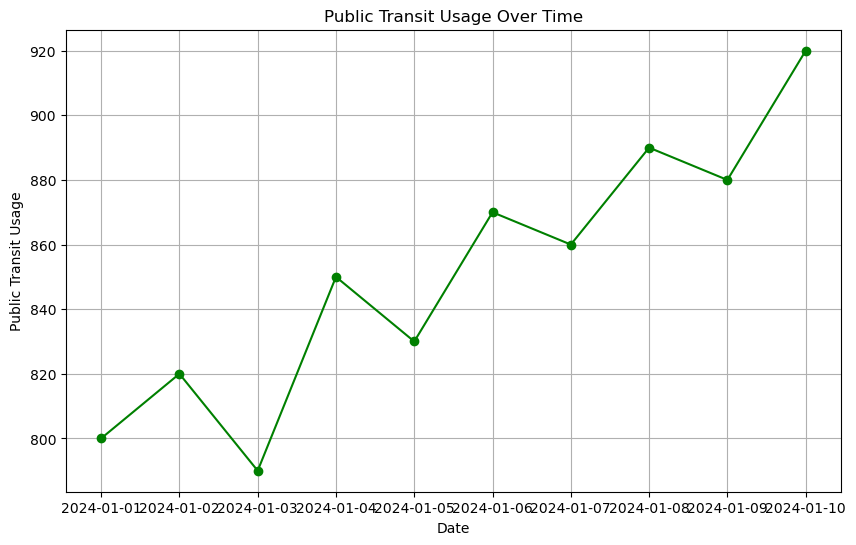

In [8]:
# Step 6: Reporting and Visualization
# Generate summary report
summary = data.describe()
summary.to_excel('transportation_data_summary.xlsx')

# Visualize Public Transit Usage Over Time
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['public_transit_usage'], marker='o', linestyle='-', color='green')
plt.title('Public Transit Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Public Transit Usage')
plt.grid(True)
plt.show()